In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pickle

In [2]:
df=pd.read_csv("Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv")

In [3]:
print("Shape of the dataset:", df.shape)
num_rows, num_columns = df.shape
print("Number of rows: " , num_rows)
print("Number of columns: " , num_columns)

Shape of the dataset: (576, 5)
Number of rows:  576
Number of columns:  5


In [4]:
print("Dataset: ")
print(df)

Dataset: 
     Months since Last Donation  Number of Donations  \
619                           2                   50   
664                           0                   13   
441                           1                   16   
160                           2                   20   
358                           1                   24   
..                          ...                  ...   
698                          23                    1   
433                          16                    3   
360                          21                    2   
541                          39                    1   
74                           72                    1   

     Total Volume Donated (c.c.)  Months since First Donation  \
619                        12500                           98   
664                         3250                           28   
441                         4000                           35   
160                         5000                         

In [5]:
#To show the data type of the dataset
print("\nData Type")
print(df.dtypes)


Data Type
Months since Last Donation     int64
Number of Donations            int64
Total Volume Donated (c.c.)    int64
Months since First Donation    int64
Made Donation in March 2007    int64
dtype: object


In [6]:
print(df.isnull().sum())

Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64


In [7]:
description = df.describe()
print("\nDescription of the dataset:")
print(description)


Description of the dataset:
       Months since Last Donation  Number of Donations  \
count                  576.000000           576.000000   
mean                     9.439236             5.427083   
std                      8.175454             5.740010   
min                      0.000000             1.000000   
25%                      2.000000             2.000000   
50%                      7.000000             4.000000   
75%                     14.000000             7.000000   
max                     74.000000            50.000000   

       Total Volume Donated (c.c.)  Months since First Donation  \
count                   576.000000                   576.000000   
mean                   1356.770833                    34.050347   
std                    1435.002556                    24.227672   
min                     250.000000                     2.000000   
25%                     500.000000                    16.000000   
50%                    1000.000000            

In [8]:
print("\nHead of the dataset:")
print(df.head())


Head of the dataset:
     Months since Last Donation  Number of Donations  \
619                           2                   50   
664                           0                   13   
441                           1                   16   
160                           2                   20   
358                           1                   24   

     Total Volume Donated (c.c.)  Months since First Donation  \
619                        12500                           98   
664                         3250                           28   
441                         4000                           35   
160                         5000                           45   
358                         6000                           77   

     Made Donation in March 2007  
619                            1  
664                            1  
441                            1  
160                            1  
358                            0  


In [9]:
print("\nTail of the dataset:")
print(df.tail())


Tail of the dataset:
     Months since Last Donation  Number of Donations  \
698                          23                    1   
433                          16                    3   
360                          21                    2   
541                          39                    1   
74                           72                    1   

     Total Volume Donated (c.c.)  Months since First Donation  \
698                          250                           23   
433                          750                           86   
360                          500                           52   
541                          250                           39   
74                           250                           72   

     Made Donation in March 2007  
698                            0  
433                            0  
360                            0  
541                            0  
74                             0  


In [10]:
df.dropna(inplace=True)
df

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0
...,...,...,...,...,...
698,23,1,250,23,0
433,16,3,750,86,0
360,21,2,500,52,0
541,39,1,250,39,0


In [11]:
df.rename(columns={'Made Donation in March 2007': 'Eligible for donation or not'}, inplace=True)
df

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Eligible for donation or not
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0
...,...,...,...,...,...
698,23,1,250,23,0
433,16,3,750,86,0
360,21,2,500,52,0
541,39,1,250,39,0


In [12]:
# Replace the column names with correct names
df = df.rename(columns={'Months since Last Donation': 'Months since Last Donation',
                        'Number of Donations       ': 'Number of Donations',
                        'Total Volume Donated (c.c.)': 'Total Volume Donated',
                        'Months since First Donation    ': 'Months since First Donation'})




In [13]:
# Now you can access the columns using correct names
X = df[['Months since Last Donation', 'Number of Donations', 'Total Volume Donated', 'Months since First Donation']]
y = df['Eligible for donation or not']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


c:\Users\91915\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\91915\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\91915\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\91915\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

In [16]:
# Initialize the SVC model
svc_model = SVC(kernel='linear', random_state=42)

In [17]:
# Train the SVC model
svc_model.fit(X_train_scaled, y_train)

c:\Users\91915\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\91915\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVC(kernel='linear', random_state=42)

In [18]:
# Make predictions
y_pred = svc_model.predict(X_test_scaled)


In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        87
           1       0.00      0.00      0.00        29

    accuracy                           0.75       116
   macro avg       0.38      0.50      0.43       116
weighted avg       0.56      0.75      0.64       116



c:\Users\91915\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\91915\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\91915\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\91915\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

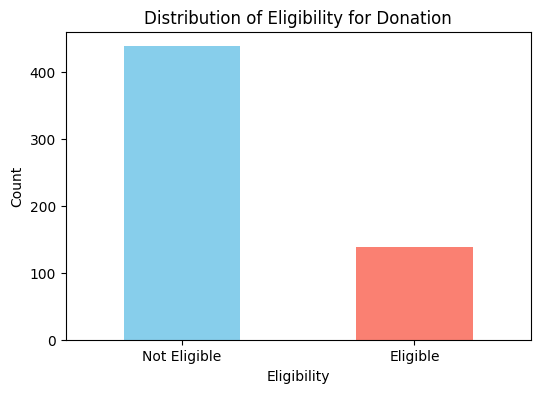

In [20]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
df['Eligible for donation or not'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Eligibility for Donation')
plt.xlabel('Eligibility')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Eligible', 'Eligible'], rotation=0)
plt.show()

In [21]:
#save the model to a file using pickle
with open('svc_model.pkl','wb') as f:
  pickle.dump(svc_model, f)